In [1]:
!pwd

/t1-data/project/tendonhca/akurjan/SCENIC_dev


In [2]:
import os
# set working directory
wdir = "/project/tendonhca/akurjan/files"
os.chdir( wdir )

#make a new output directory
if not os.path.exists(os.path.join(wdir, 'cellranger')):
    os.makedirs(os.path.join(wdir, 'cellranger'))

In [3]:
!ls

cellranger
data.dir
geneset.dir
Homo_sapiens.GRCh38.106.gtf.gz
Homo_sapiens.GRCh38.cdna.all.fa.gz
Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz
kallisto_lamanno
kallisto_lamanno_unstranded
kallisto_lamanno_v0264
metadata.tab


In [4]:
!cd cellranger && wget https://cf.10xgenomics.com/supp/cell-exp/refdata-gex-GRCh38-2020-A.tar.gz && tar -zxvf refdata-gex-GRCh38-2020-A.tar.gz

--2022-09-03 19:47:22--  https://cf.10xgenomics.com/supp/cell-exp/refdata-gex-GRCh38-2020-A.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11448662640 (11G) [application/x-tar]
Saving to: ‘refdata-gex-GRCh38-2020-A.tar.gz’

100%[===================================>] 11,448,662,640 26.8MB/s   in 7m 29s 

2022-09-03 19:54:52 (24.3 MB/s) - ‘refdata-gex-GRCh38-2020-A.tar.gz’ saved [11448662640/11448662640]

refdata-gex-GRCh38-2020-A/
refdata-gex-GRCh38-2020-A/pickle/
refdata-gex-GRCh38-2020-A/pickle/genes.pickle
refdata-gex-GRCh38-2020-A/fasta/
refdata-gex-GRCh38-2020-A/fasta/genome.fa.fai
refdata-gex-GRCh38-2020-A/fasta/genome.fa
refdata-gex-GRCh38-2020-A/star/
refdata-gex-GRCh38-2020-A/star/transcriptInfo.tab
refdata-gex-GRCh38-2020-A/star/chrNameLength.txt
refdata-gex-GRCh38-2020-A/st

`!cellranger count \
--id=Cellranger_DEV15983_Sep2022 \
--fastqs=cellranger \
--sample=DEV15983 \
--transcriptome=cellranger/refdata-gex-GRCh38-2020-A`

Outputs:
- Run summary HTML:                         /project/tendonhca/akurjan/files/dev20pcw_sep2022/outs/web_summary.html
- Run summary CSV:                          /project/tendonhca/akurjan/files/dev20pcw_sep2022/outs/metrics_summary.csv
- BAM:                                      /project/tendonhca/akurjan/files/dev20pcw_sep2022/outs/possorted_genome_bam.bam
- BAM BAI index:                            /project/tendonhca/akurjan/files/dev20pcw_sep2022/outs/possorted_genome_bam.bam.bai
- BAM CSI index:                            null
- Filtered feature-barcode matrices MEX:    /project/tendonhca/akurjan/files/dev20pcw_sep2022/outs/filtered_feature_bc_matrix
- Filtered feature-barcode matrices HDF5:   /project/tendonhca/akurjan/files/dev20pcw_sep2022/outs/filtered_feature_bc_matrix.h5
- Unfiltered feature-barcode matrices MEX:  /project/tendonhca/akurjan/files/dev20pcw_sep2022/outs/raw_feature_bc_matrix
- Unfiltered feature-barcode matrices HDF5: /project/tendonhca/akurjan/files/dev20pcw_sep2022/outs/raw_feature_bc_matrix.h5
- Secondary analysis output CSV:            /project/tendonhca/akurjan/files/dev20pcw_sep2022/outs/analysis
- Per-molecule read information:            /project/tendonhca/akurjan/files/dev20pcw_sep2022/outs/molecule_info.h5
- CRISPR-specific analysis:                 null
- CSP-specific analysis:                    null
- Loupe Browser file:                       /project/tendonhca/akurjan/files/dev20pcw_sep2022/outs/cloupe.cloupe
- Feature Reference:                        null
- Target Panel File:                        null
- Probe Set File:                           null


In [5]:
import scanpy as sc

adata = sc.read_10x_h5('dev20pcw_sep2022/outs/raw_feature_bc_matrix.h5')
adata

/home/a/akurjan/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 2089859 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [7]:
adata.var

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38
AC023491.2,ENSG00000278633,Gene Expression,GRCh38
AC007325.1,ENSG00000276017,Gene Expression,GRCh38
AC007325.4,ENSG00000278817,Gene Expression,GRCh38


In [9]:
adata.var_names_make_unique()
adata.var.index.is_unique

True

In [10]:
# mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
# ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
# hemoglobin genes.
adata.var['hb'] = adata.var_names.str.contains(("^HB[^(P)]"))

adata.var.head()

,gene_ids,feature_types,genome,mt,ribo,hb
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,False,False,False
FAM138A,ENSG00000237613,Gene Expression,GRCh38,False,False,False
OR4F5,ENSG00000186092,Gene Expression,GRCh38,False,False,False
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,False,False,False
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,False,False,False


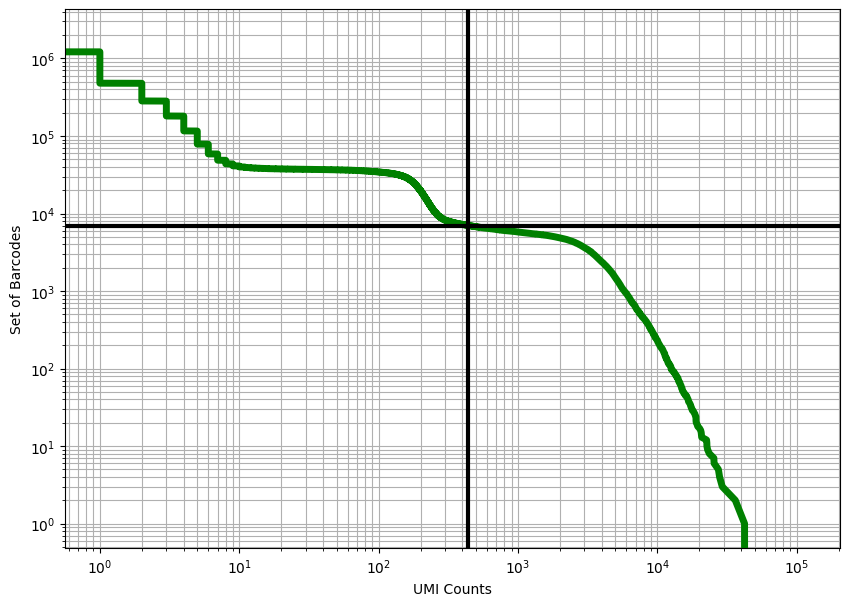

In [11]:
import numpy as np
import matplotlib.pyplot as plt

expected_num_cells = 7000 #@param {type:"integer"}
knee = np.sort((np.array(adata.X.sum(axis=1))).flatten())[::-1]

fig, ax = plt.subplots(figsize=(10, 7))

ax.loglog(knee, range(len(knee)), linewidth=5, color="g")
ax.axvline(x=knee[expected_num_cells], linewidth=3, color="k")
ax.axhline(y=expected_num_cells, linewidth=3, color="k")

ax.set_xlabel("UMI Counts")
ax.set_ylabel("Set of Barcodes")

plt.grid(True, which="both")
plt.show()

In [12]:
# Removes cells with less than 400 UMI counts (check knee plot)
adata = adata[np.asarray(adata.X.sum(axis=1)).reshape(-1) > 400]

# Removes genes with 0 umi counts
adata = adata[:, np.asarray(adata.X.sum(axis=0)).reshape(-1) > 0]

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata.n_obs, adata.n_vars)

/home/a/akurjan/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


7205 26176


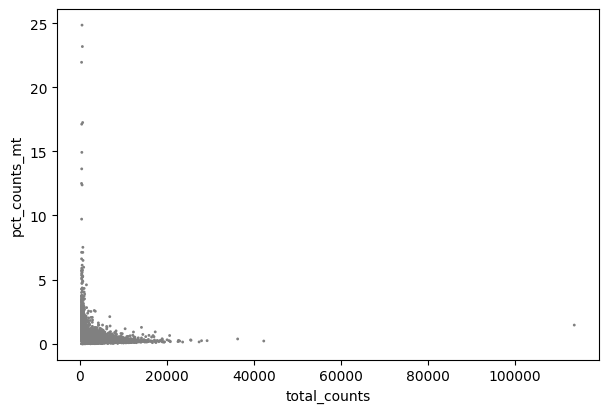

In [14]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

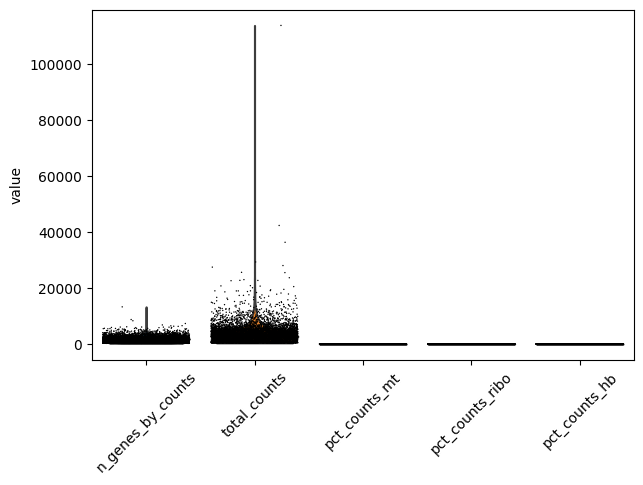

In [15]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, rotation= 45)

`!cellranger count \
--id=Cellranger_DEV15984_Sep2022 \
--fastqs=cellranger/DEV15984 \
--sample=DEV15984-ACH-MB-H-date20220325 \
--transcriptome=cellranger/refdata-gex-GRCh38-2020-A &&
cellranger count \
--id=Cellranger_DEV15985_Sep2022 \
--fastqs=cellranger/DEV15985 \
--sample=DEV15985-ACH-MB-H-date20211213 \
--transcriptome=cellranger/refdata-gex-GRCh38-2020-A`

In [16]:
adata = sc.read_10x_h5('Cellranger_DEV15984_Sep2022/outs/raw_feature_bc_matrix.h5')
adata

/home/a/akurjan/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 1743268 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

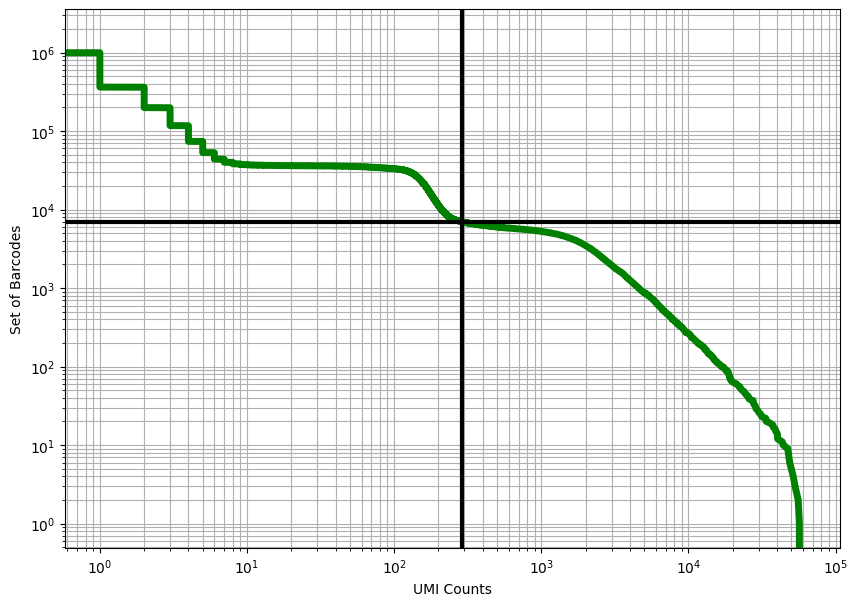

In [17]:
expected_num_cells = 7000 #@param {type:"integer"}
knee = np.sort((np.array(adata.X.sum(axis=1))).flatten())[::-1]

fig, ax = plt.subplots(figsize=(10, 7))

ax.loglog(knee, range(len(knee)), linewidth=5, color="g")
ax.axvline(x=knee[expected_num_cells], linewidth=3, color="k")
ax.axhline(y=expected_num_cells, linewidth=3, color="k")

ax.set_xlabel("UMI Counts")
ax.set_ylabel("Set of Barcodes")

plt.grid(True, which="both")
plt.show()

In [23]:
adata = sc.read_10x_h5('Cellranger_DEV15985_Sep2022/outs/raw_feature_bc_matrix.h5')
adata

/home/a/akurjan/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 2428758 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

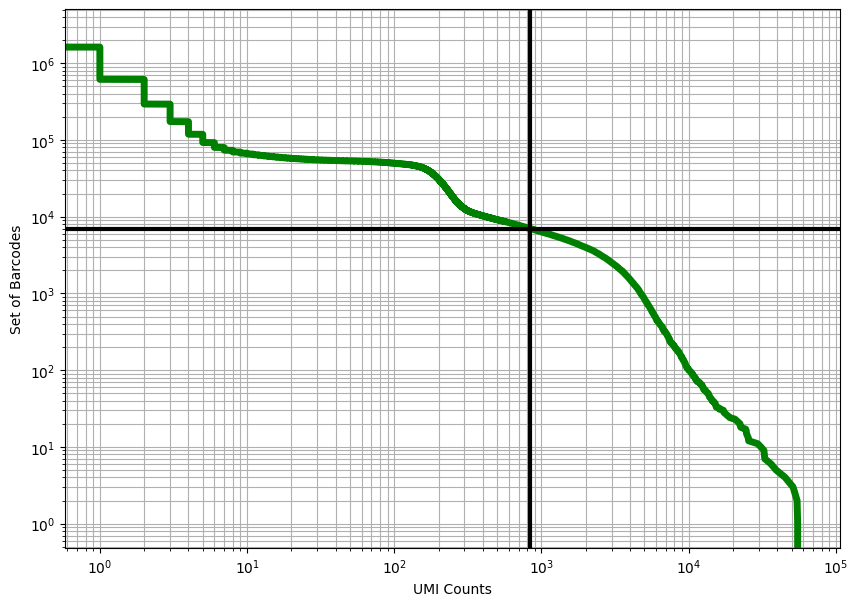

In [24]:
expected_num_cells = 7000 #@param {type:"integer"}
knee = np.sort((np.array(adata.X.sum(axis=1))).flatten())[::-1]

fig, ax = plt.subplots(figsize=(10, 7))

ax.loglog(knee, range(len(knee)), linewidth=5, color="g")
ax.axvline(x=knee[expected_num_cells], linewidth=3, color="k")
ax.axhline(y=expected_num_cells, linewidth=3, color="k")

ax.set_xlabel("UMI Counts")
ax.set_ylabel("Set of Barcodes")

plt.grid(True, which="both")
plt.show()

In [25]:
# Removes cells with less than 500 UMI counts (check knee plot)
adata = adata[np.asarray(adata.X.sum(axis=1)).reshape(-1) > 500]

# Removes genes with 0 umi counts
adata = adata[:, np.asarray(adata.X.sum(axis=0)).reshape(-1) > 0]

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata.n_obs, adata.n_vars)

/home/a/akurjan/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/a/akurjan/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


9118 24962


/home/a/akurjan/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [27]:
adata.var_names_make_unique()

# mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
# ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
# hemoglobin genes.
adata.var['hb'] = adata.var_names.str.contains(("^HB[^(P)]"))

adata.var.head()

,gene_ids,feature_types,genome,n_cells,mt,ribo,hb
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,6,False,False,False
AL627309.5,ENSG00000241860,Gene Expression,GRCh38,20,False,False,False
AL627309.4,ENSG00000241599,Gene Expression,GRCh38,3,False,False,False
AL669831.2,ENSG00000229905,Gene Expression,GRCh38,4,False,False,False
LINC01409,ENSG00000237491,Gene Expression,GRCh38,356,False,False,False


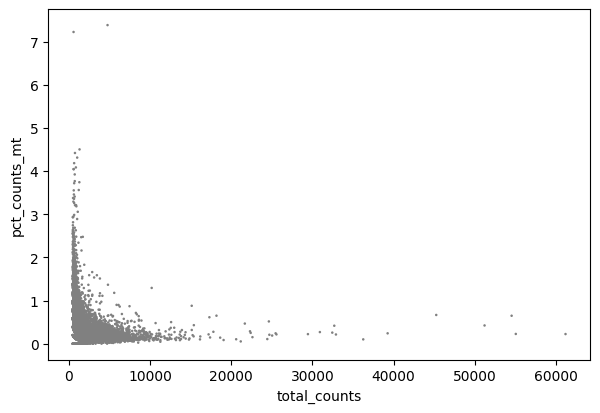

In [28]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

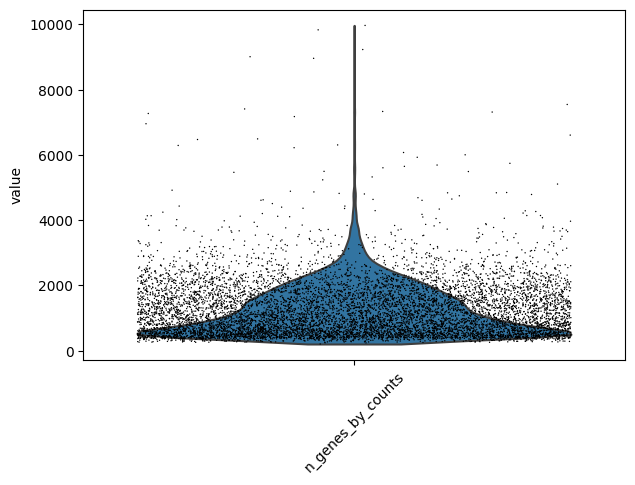

In [31]:
sc.pl.violin(adata, ['n_genes_by_counts'],
             jitter=0.4, rotation= 45)

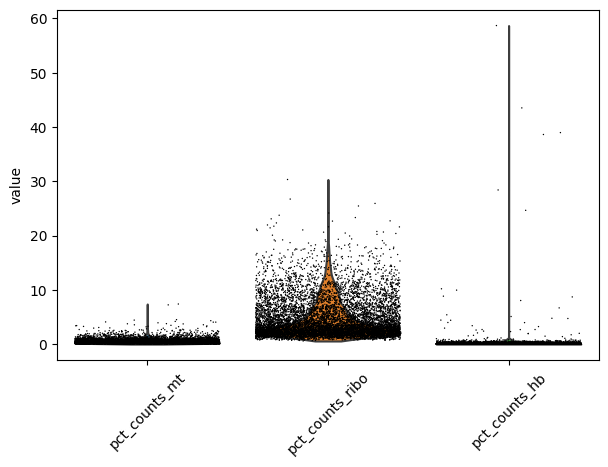

In [32]:
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, rotation= 45)

# Velocyto Velocity Processing

Repeat masking file downloaded from: https://genome.ucsc.edu/cgi-bin/hgTables

`!gunzip cellranger/h38_repeat_mask.gtf.gz`

`!velocyto run10x \
-m cellranger/h38_repeat_mask.gtf \
--verbose \
Cellranger_DEV15983_Sep2022 \
cellranger/refdata-gex-GRCh38-2020-A/genes/genes.gtf`